Dominant Colors (RGB and Closest Name):
RGB: (227, 195, 242), Closest CSS3 Name: thistle


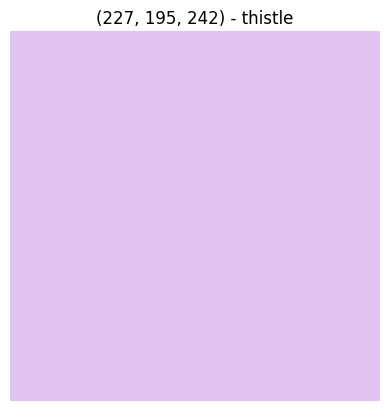

RGB: (57, 74, 59), Closest CSS3 Name: darkslategray


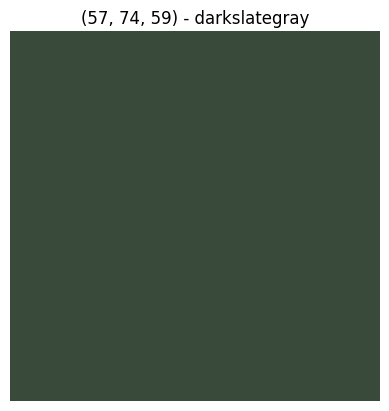

RGB: (195, 123, 197), Closest CSS3 Name: orchid


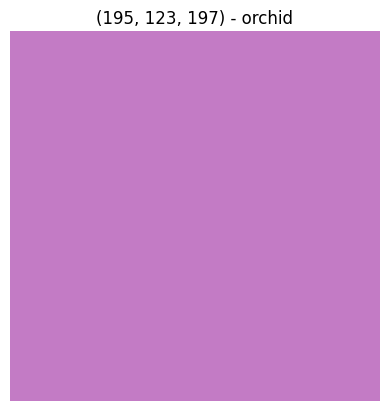

RGB: (16, 24, 23), Closest CSS3 Name: black


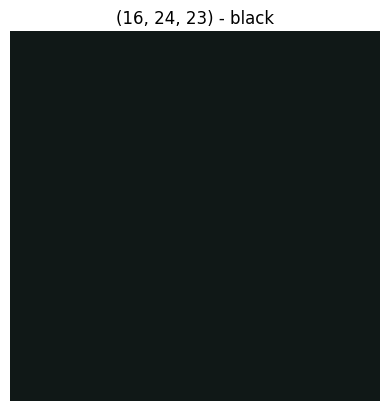

RGB: (167, 144, 41), Closest CSS3 Name: darkgoldenrod


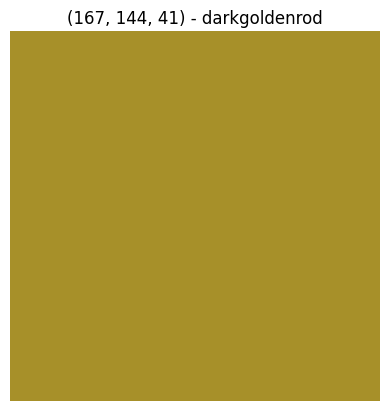

In [30]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import webcolors
from math import sqrt
import matplotlib.pyplot as plt

# --- Helper function to get closest color name ---
def closest_color(requested_color):
    min_distance = float("inf")
    closest_name = None
    
    # loop over all CSS3 names
    for name in webcolors.names("css3"):
        hex_value = webcolors.name_to_hex(name, spec="css3")
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_value)
        distance = sqrt((r_c - requested_color[0]) ** 2 +
                        (g_c - requested_color[1]) ** 2 +
                        (b_c - requested_color[2]) ** 2)
        if distance < min_distance:
            min_distance = distance
            closest_name = name
    return closest_name

# --- Load the image ---
image_path = r"C:\Users\jomana farag soliman\Downloads\task01_color_identification\sample.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR → RGB

# --- Resize (optional for faster clustering) ---
resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)

# --- Flatten pixels ---
pixels = resized.reshape(-1, 3)

# --- Apply KMeans for dominant colors ---
k = 5   # number of dominant colors
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

# --- Extract cluster centers ---
dominant_colors = kmeans.cluster_centers_.astype(int)

# --- Print results ---
print("Dominant Colors (RGB and Closest Name):")
for color in dominant_colors:
    name = closest_color(color)
    print(f"RGB: {tuple(color)}, Closest CSS3 Name: {name}")

    # show swatches
    plt.figure()
    plt.imshow([[color/255.0]])
    plt.title(f"{tuple(color)} - {name}")
    plt.axis("off")
    plt.show()


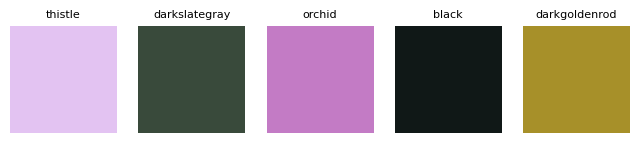

In [31]:
import matplotlib.pyplot as plt

# Show all dominant colors in a palette
plt.figure(figsize=(8, 4))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, len(dominant_colors), i+1)
    plt.imshow([[color]])  
    plt.axis("off")
    plt.title(closest_color(color), fontsize=8)

plt.show()


In [34]:
import pandas as pd 

results = []
for color in dominant_colors:
    # Ensure color is tuple of ints
    color = tuple(int(c) for c in color)
    
    results.append({
        "RGB": color,
        "Closest CSS3 Name": closest_color(color),
        "Hex": '#%02x%02x%02x' % color
    })

df = pd.DataFrame(results)
df.to_csv("dominant_colors.csv", index=False)

print("Results saved to dominant_colors.csv")



Results saved to dominant_colors.csv
